# <center> <span style="color:indigo">        Escuela de ML y DL Módulo 1</span> </center>
##  <center> <span style="color:DarkBlue">         TAREA 4. K-medoids</span>  </center>
##  <center> <span style="color:DarkBlue"> Karla Guadalupe Ornelas Gamero</span>  </center>
##  <center> <span style="color:DarkBlue">karla.gameroo@gmail.com</span>  </center>
##  <center> <span style="color:DarkBlue"> Abril 2024</span>  </center>

##  Contenido
1. <span style="color:DarkBlue">Planteamiento del problema (qué hacer)</span>
2. <span style="color:DarkBlue">Planteamiento de la solución (cómo se hizó)</span>
3. <span style="color:DarkBlue">Ejemplo de ejecución (código)</span>
4. <span style="color:DarkBlue">Conclusiones </span>
5. <span style="color:DarkBlue">Referencias</span>


## <span style="color:DarkBlue"> 1. Planteamiento del problema</span>
Haciendo uso de la práctica 4 y el
dataset que se mostró en clase, también disponible en https://www.kaggle.com/hellbuoy/online-retail-customer-clustering haga lo siguiente:

* Construya un modelo K-medoids para hacer clustering igual a lo visto en la
sesión.
* Obtenga las métricas de inercia y silhouette.
* Haga el análisis comparativo entre ambos
modelos.
* Documente sus resultados (añada gráficas).

## <span style="color:DarkciónBlue"> 2. Planteamiento de la solución</span>
Se implementara El metodo K-medoids para realizar las comparaciones y obtener el mejor resultado

#  K-medoids

In [ ]:


%matplotlib inline
import os
import zipfile
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
#Se puede utilizar para indicar una ruta del archivo
Path = ""

In [ ]:
#Se renombra el archivo para que sea más claro cuál es el que se usa. Vea el insiso e de la parte 3 de la práctica 0
with zipfile.ZipFile(Path+'OnlineRetail.zip', 'r') as archive:
    archive.extractall(Path)

In [ ]:
#Mostrar la ruta del csv
#os.listdir(Path)

In [ ]:
o_retail = pd.read_csv(Path+"OnlineRetail.csv", encoding="ISO-8859-1")

In [ ]:
o_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
o_retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
o_retail["CustomerID"] = o_retail["CustomerID"].fillna(0)

In [ ]:
o_retail.info() #Revisar diferencia InvoiceNo y CustomerID

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


C:\Users\Karla\anaconda3\envs\ML\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'France'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Netherlands'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'Norway'),
  Text(6, 0, 'EIRE'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Spain'),
  Text(9, 0, 'Poland'),
  Text(10, 0, 'Portugal'),
  Text(11, 0, 'Italy'),
  Text(12, 0, 'Belgium'),
  Text(13, 0, 'Lithuania'),
  Text(14, 0, 'Japan'),
  Text(15, 0, 'Iceland'),
  Text(16, 0, 'Channel Islands'),
  Text(17, 0, 'Denmark'),
  Text(18, 0, 'Cyprus'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Austria'),
  Text(21, 0, 'Israel'),
  Text(22, 0, 'Finland'),
  Text(23, 0, 'Bahrain'),
  Text(24, 0, 'Greece'),
  Text(25, 0, 'Hong Kong'),
  Text(26, 0, 'Singapore'),
  Text(27, 0, 'Lebanon'),
  Text(28, 0, 'United Arab Emirates'),
  Text(2

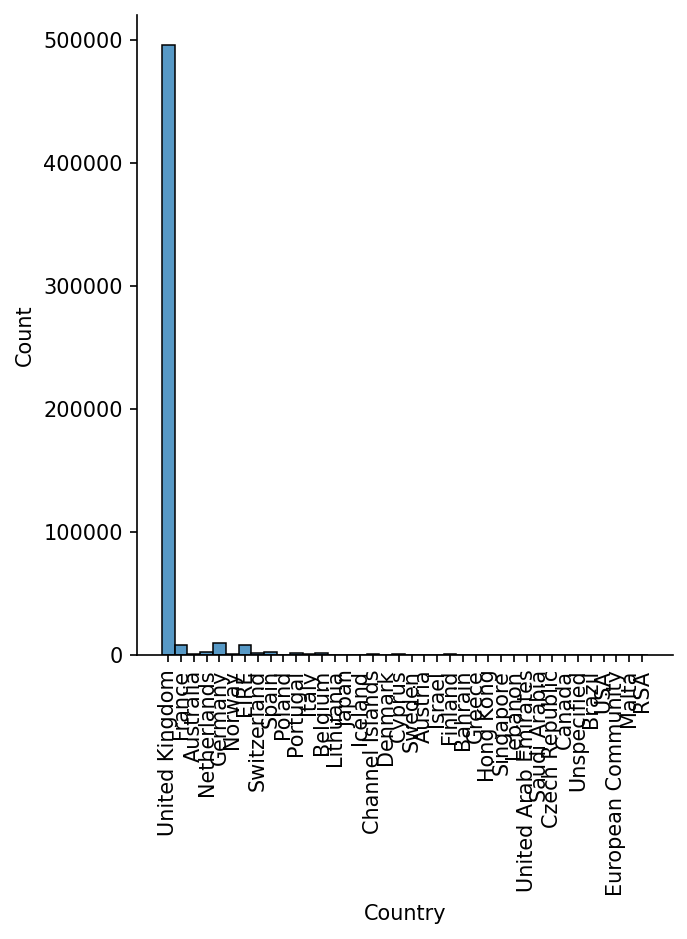

In [ ]:
#print(o_retail["Country"].value_counts())
P = sns.displot(data=o_retail["Country"])
P.fig.set_dpi(150)
plt.xticks(rotation=90)



In [ ]:
#Eliminamos elementos nulos del dataset
o_retail.dropna(inplace=True)
o_retail.describe()

,Quantity,UnitPrice,CustomerID
count,540455.000000,540455.000000,540455.000000
mean,9.603129,4.623519,11507.851471
std,218.007598,96.889628,6760.792031
min,-80995.000000,-11062.060000,0.000000
25%,1.000000,1.250000,12367.000000
50%,3.000000,2.080000,14390.000000
75%,10.000000,4.130000,16261.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#Vemos la cantidad de valores unicos que tiene cada columna
for i in o_retail:
    print(i, o_retail[i].nunique())

InvoiceNo 24446
StockCode 3958
Description 4223
Quantity 671
InvoiceDate 22309
UnitPrice 1630
CustomerID 4373
Country 38


## Agregar pedidos por adelantado

Existen muchas compras hechas por adelantado, eso quiere decir que al consumidor se le DEBEN entregar n cantidad de articulos, por eso, en la columna Quantity hay valores negativos (cantidad de articulos que se deben). Para eliminar esto, se agregará una nueva columna que indique si la compra es por adelantada o no

In [ ]:
o_retail[o_retail["Quantity"] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
"""def status(df):
    #Seleccionamos los valores negativos en Quantity
    df["Status"] = 1 #"Bought"
    aux = df[df["Quantity"] < 0]
    for i in aux.index:
        df.loc[i, "Quantity"] = -1*(df.loc[i, "Quantity"])
        df.loc[i, "Status"] = 0 #"Credit"
    return df"""

def status(quantity):
    if quantity < 0:
        quantity = quantity*(-1)
        return 0 #"Credit"
    return 1


In [ ]:
o_retail["Status"] = o_retail.apply(lambda Row: status(Row["Quantity"]), axis=1)

In [ ]:
o_retail["Status"].value_counts()

Status
1    530693
0      9762
Name: count, dtype: int64

In [ ]:
o_retail[o_retail["Status"] == 1] #Crédito, Falta de stock

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France,1


In [ ]:
# Cambiar el dtype de CustomerID a str
o_retail['CustomerID'] = o_retail['CustomerID'].astype(str)

### Agregar una columna de monto total, multiplicando Quantity * UnitPrice

In [ ]:
o_retail['AmountTotal'] = o_retail['Quantity']*o_retail['UnitPrice']

In [ ]:
o_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status,AmountTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,1,20.34


## Cambiar el tipo de formato de la columna InvoiceDate a que sea date type

In [ ]:
o_retail['InvoiceDate'] = pd.to_datetime(o_retail['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [ ]:
o_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status,AmountTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,20.34


Crear una columna que muestre la última actividad de cada cliente, con respecto a la fecha más reciente del Dataset

In [ ]:
#Fecha más reciente
dateMax = o_retail['InvoiceDate'].max()
print(dateMax)

2011-12-09 12:50:00


In [ ]:
#Se crea la columna con la direcia de fechas
o_retail['LastInvoce'] = dateMax - o_retail['InvoiceDate']

In [ ]:
#Se calculan los dias de diferencia
o_retail['LastInvoce'] = o_retail['LastInvoce'].dt.days

In [ ]:
o_retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Status,AmountTotal,LastInvoce
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1,20.34,373
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,1,10.20,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,1,12.60,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,1,16.60,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,1,16.60,0


## Crear un nuevo df con las columnas que usaremos. Este tendrá como index la columna CustomerID

In [ ]:
#Se utilizarán columnas útiles para el clustering; invoice (num), amountT, LastI
invoice = pd.DataFrame(o_retail.groupby('CustomerID')['InvoiceNo'].count())
amountT = pd.DataFrame(o_retail.groupby('CustomerID')['AmountTotal'].sum())
lastI = pd.DataFrame(o_retail.groupby('CustomerID')['LastInvoce'].min())

#NOTA: Status no se utiliza por ser un estado y no influye en el análisis, amountT incluye Cantidad por Precio

In [ ]:
invoice.head()

,InvoiceNo
CustomerID,
0.0,133626
12346.0,2
12347.0,182
12348.0,31
12349.0,73


In [ ]:
new_retail = pd.concat([invoice, amountT, lastI], axis=1)

In [ ]:
new_retail

,InvoiceNo,AmountTotal,LastInvoce
CustomerID,,,
0.0,133626,1447682.12,0
12346.0,2,0.00,325
12347.0,182,4310.00,1
12348.0,31,1797.24,74
12349.0,73,1757.55,18
...,...,...,...
18280.0,10,180.60,277
18281.0,7,80.82,180
18282.0,13,176.60,7


# Incicia wl ML no supervisado
## Escalar los datos

In [ ]:
#Escalar con valores Mínimos-máximos y con un estándar Scaler [0,1]
scaler = MinMaxScaler()
scalerSS = StandardScaler()

In [ ]:
def escalar(df, scal):
    ind = df.index
    retail_scaler = pd.DataFrame(scal.fit_transform(df), index=ind)
    retail_scaler.columns = df.columns
    return retail_scaler, scal

In [ ]:
df_MMS, scaler = escalar(new_retail, scaler)
df_SS, scalerSS = escalar(new_retail, scalerSS)

In [ ]:
df_MMS

,InvoiceNo,AmountTotal,LastInvoce
CustomerID,,,
0.0,1.000000,1.000000,0.000000
12346.0,0.000007,0.002953,0.871314
12347.0,0.001355,0.005921,0.002681
12348.0,0.000225,0.004191,0.198391
12349.0,0.000539,0.004163,0.048257
...,...,...,...
18280.0,0.000067,0.003077,0.742627
18281.0,0.000045,0.003009,0.482574
18282.0,0.000090,0.003075,0.018767


# Construir modelo

In [ ]:
#Predicción con DF y Modelo de KMEANS
def prediccion(df, model):
    model.fit(df)
    print(model.predict(df))
    print("Inercia Kmeans = ", model.inertia_)
    pred = model.predict(df)
    Inercia_kMeans = pred
    return pred, Inercia_kMeans

In [ ]:
def prediccionkmedoids(df, model):
    model.fit(df)
    print(model.predict(df))
    print("Inercia kMedoids = ", model.inertia_)
    predD = model.predict(df)
    Inercia_kmedoids = predD
    return predD, Inercia_kmedoids

Las predicciones se manejarán usando 2 formatos de escala, MinMaxScaler y SatandarScaler y se analizarán las diferencias.

## Buscar el mejor número de clusters con la inercia

In [ ]:
def buscar_k(df):
    SSE = []
    for cluster in range(1,20):
        kmeans = KMeans(n_clusters = cluster, init='k-means++')
        kmeans.fit(df)
        SSE.append(kmeans.inertia_)
    porc = 1
    for i in range(len(SSE)-1):
        dif = (SSE[i] - SSE[i+1])
        print('Punto',i+1,'a',i+2, dif/porc) #dif/porc
        porc = dif
        #print(dif, porc)
    plt.plot(range(1,20), SSE, 'o-')

### MinMaxScaler

In [ ]:
kmeansMMS = KMeans(n_clusters=2, init='k-means++')
predMMS, inercia_kmeans_min  = prediccion(df_MMS, kmeansMMS)


[0 1 0 ... 0 0 0]
Inercia Kmeans =  67.69547831445323


In [ ]:
# Crear una instancia de KMedoids con el número de clústeres deseado
kmedoidsMMS = KMedoids(n_clusters=2, random_state=0)

# Ajustar el modelo KMedoids a los datos
predDMMS, inercia_kmedoids_min = prediccionkmedoids(df_MMS, kmedoidsMMS)


[1 0 1 ... 1 1 1]
Inercia kMedoids =  414.2402188243724


In [ ]:
#Modelo entrenado con Minmaxscaler
silhouette_MMS = silhouette_score(df_MMS, kmeansMMS.labels_, metric='euclidean')
print("Silhouette KMEANS =", silhouette_MMS)

Silhouette KMEANS = 0.7382238144928448


In [ ]:
silhouette_DMMS = silhouette_score(df_MMS, kmedoidsMMS.labels_, metric='euclidean')
print("Silhouette KMEDOIDS =", silhouette_DMMS)

Silhouette KMEDOIDS = 0.734996968429592


In [ ]:
predMMS[:350]

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
predDMMS[:350]

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

Punto 1 a 2 253.5038419996926
Punto 2 a 3 0.13635914587336118
Punto 3 a 4 0.38741864188215264
Punto 4 a 5 0.5019238200547164
Punto 5 a 6 0.491760232411606
Punto 6 a 7 0.5978055898753842
Punto 7 a 8 0.942573183055783
Punto 8 a 9 0.7384932089006337
Punto 9 a 10 0.7595986599207458
Punto 10 a 11 0.6656772883047317
Punto 11 a 12 0.7125102087575844
Punto 12 a 13 0.7298208779580198
Punto 13 a 14 0.8209872307007382
Punto 14 a 15 0.6436534865601446
Punto 15 a 16 0.907452172239488
Punto 16 a 17 0.6390192956530463
Punto 17 a 18 0.9998537327603623
Punto 18 a 19 0.8926051793461233


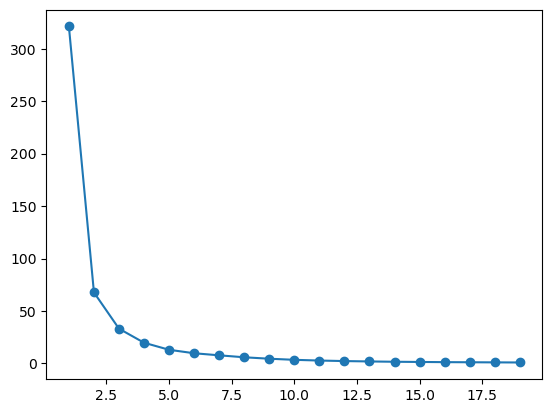

In [ ]:
buscar_k(df_MMS) #Entre 4 y 5 es el K optimo

In [ ]:
kmeansMMSK = KMeans(n_clusters = 5, init='k-means++')
predMMSK, inercia_kmeans_max = prediccion(df_MMS, kmeansMMSK) #La inercia bajó

[3 4 3 ... 3 3 3]
Inercia Kmeans =  13.014768697214471


In [ ]:
kmedoidsDMMSK = KMedoids(n_clusters=5, random_state=0)

# Ajustar el modelo KMedoids a los datos
predDMMSK, inercia_kmedoids_max = prediccionkmedoids(df_MMS, kmedoidsDMMSK)


[3 4 3 ... 3 3 2]
Inercia kMedoids =  182.51181243114468


In [ ]:
silhouette_MMSK = silhouette_score(df_MMS, kmeansMMSK.labels_, metric='euclidean')
print("Silhouette KMeans=", silhouette_MMSK)

Silhouette KMeans= 0.6136461096265166


In [ ]:
# Calcular la puntuación de silueta usando las predicciones del modelo KMedoids
silhouette_DMMSK = silhouette_score(df_MMS, predDMMSK, metric='euclidean')
print("Silhouette KMedoids =", silhouette_DMMSK)

Silhouette KMedoids = 0.5449958312772962


In [ ]:
predMMSK[:150]

array([3, 4, 3, 0, 3, 4, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 3, 0, 3, 1, 3, 0,
       0, 0, 4, 3, 3, 4, 2, 0, 3, 3, 2, 3, 4, 3, 0, 3, 0, 0, 3, 3, 0, 2,
       4, 4, 0, 2, 3, 0, 3, 0, 4, 0, 0, 1, 3, 3, 0, 0, 3, 0, 3, 2, 0, 2,
       3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 4, 3, 3, 3, 0, 1, 0, 3, 2, 3,
       3, 2, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 3, 0, 2, 3, 0, 3, 3, 4, 0, 4, 3, 4, 1, 2, 3,
       1, 2, 0, 0, 1, 4, 0, 3, 3, 0, 0, 2, 3, 3, 3, 3, 0, 3])

In [ ]:
predDMMSK[:150]

array([3, 4, 3, 1, 3, 4, 2, 0, 0, 0, 2, 2, 3, 3, 2, 4, 3, 1, 3, 4, 3, 2,
       2, 1, 4, 2, 3, 4, 0, 1, 2, 3, 0, 2, 4, 3, 1, 2, 1, 1, 3, 2, 2, 1,
       4, 4, 2, 0, 2, 2, 2, 1, 4, 1, 1, 0, 2, 3, 1, 1, 3, 1, 3, 0, 1, 0,
       3, 2, 3, 2, 2, 2, 3, 1, 1, 1, 3, 3, 4, 3, 3, 2, 1, 4, 2, 2, 0, 3,
       3, 0, 2, 1, 2, 1, 1, 1, 3, 2, 3, 3, 0, 3, 2, 2, 3, 2, 3, 2, 3, 3,
       2, 2, 3, 2, 3, 4, 3, 2, 1, 0, 3, 1, 2, 2, 4, 1, 4, 3, 4, 4, 0, 2,
       4, 0, 1, 1, 4, 4, 1, 2, 3, 1, 1, 0, 2, 3, 3, 3, 1, 3], dtype=int64)

In [ ]:
inercia_kmedoids_max

array([3, 4, 3, ..., 3, 3, 2], dtype=int64)

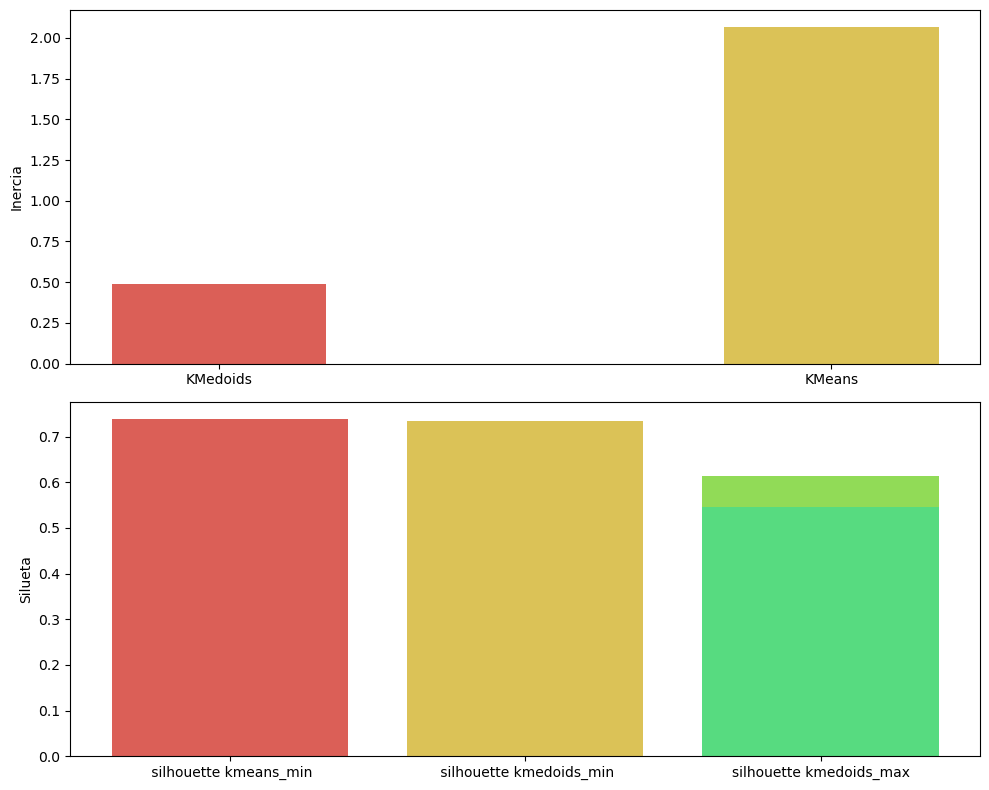

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define los nombres de los modelos
model_names = ['KMedoids', 'KMeans']

# Calcula los valores promedio de inercia
inercia_min_avg = np.mean([inercia_kmedoids_min, inercia_kmeans_min])
inercia_max_avg = np.mean([inercia_kmedoids_max, inercia_kmeans_max])
inercia_values_avg = [inercia_min_avg, inercia_max_avg]

# Define los valores de las métricas de silueta y sus etiquetas
silhouette_values = [silhouette_MMS, silhouette_DMMS, silhouette_MMSK, silhouette_DMMSK]
silhouette_labels = [' silhouette kmeans_min', ' silhouette kmedoids_min', 'silhouette kmedoids_max', 'silhouette kmedoids_max']
palette = sns.color_palette('hls', k)
# Graficar las métricas de inercia y silueta
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Graficar las métricas de inercia
x = np.arange(len(model_names))
width = 0.35
axs[0].bar(x, inercia_values_avg, width, color=palette)
axs[0].set_ylabel('Inercia')
axs[0].set_xticks(x)
axs[0].set_xticklabels(model_names)

# Graficar las métricas de silueta
axs[1].bar(silhouette_labels, silhouette_values, color=palette)
axs[1].set_ylabel('Silueta')

plt.tight_layout()
plt.show()



### StandardScaler

In [ ]:
kmeansSS = KMeans(n_clusters=2, init='k-means++')
predSS, inercia_kmeans_SS = prediccion(df_SS, kmeansSS)

[1 0 0 ... 0 0 0]
Inercia Kmeans =  4970.78241019893


In [ ]:
kmedoidsSS = KMedoids(n_clusters=2, random_state=0)
predDSS, inercia_kmedoids_SS = prediccionkmedoids(df_SS, kmedoidsSS)

[1 0 1 ... 1 1 1]
Inercia kMedoids =  1804.3827388429613


In [ ]:
#Modelo entrenado con StandardScaler
silhouette_SS = silhouette_score(df_MMS, kmeansSS.labels_, metric='euclidean')
print("Silhouette SS =", silhouette_SS)

Silhouette SS = 0.8110611883248606


In [ ]:
#Modelo entrenado con StandardScaler
silhouette_DSS = silhouette_score(df_MMS, kmedoidsSS.labels_, metric='euclidean')
print("Silhouette SS =", silhouette_DSS)

Silhouette SS = 0.734996968429592


In [ ]:
predSS[:350]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
predDSS[:350]

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

Punto 1 a 2 8148.217589801065
Punto 2 a 3 0.427153616868002
Punto 3 a 4 0.13674208167613644
Punto 4 a 5 0.7568880269979643
Punto 5 a 6 0.5186047641880673
Punto 6 a 7 0.5372057815881702
Punto 7 a 8 0.9212207664528069
Punto 8 a 9 0.4903963608458307
Punto 9 a 10 0.7192015323929556
Punto 10 a 11 0.7527752765502852
Punto 11 a 12 0.8778768896425676
Punto 12 a 13 0.8896843299210225
Punto 13 a 14 0.7859141455491202
Punto 14 a 15 1.0405816334904234
Punto 15 a 16 0.6514862483068415
Punto 16 a 17 0.9958625896003771
Punto 17 a 18 0.4657661518116845
Punto 18 a 19 1.8539928926884572


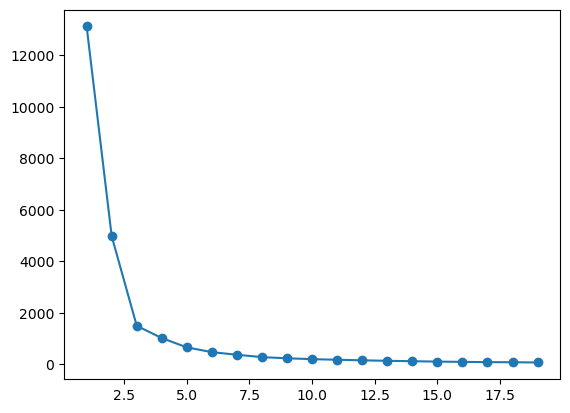

In [ ]:
buscar_k(df_SS) # Entre 8 y 9 es el k optimo

In [ ]:
kmeansSSK = KMeans(n_clusters = 8, init='k-means++')
predSSK , inercia_kmeans_SSK = prediccion(df_SS, kmeansSSK)#La inercia bajó

[1 3 2 ... 2 2 2]
Inercia Kmeans =  274.42537607018056


In [ ]:
kmedoidsSSK = KMedoids(n_clusters = 8, random_state=0)
predDSSK, inercia_kmedoids_SSK = prediccionkmedoids(df_SS, kmedoidsSSK)

[7 1 7 ... 7 7 6]
Inercia kMedoids =  747.3978087156796


In [ ]:
silhouette_SSK = silhouette_score(df_SS, kmeansSSK.labels_, metric='euclidean')
print("Silhouette =", silhouette_SSK)

Silhouette = 0.5416249580468708


In [ ]:
silhouette_DSSK = silhouette_score(df_SS, kmedoidsSSK.labels_, metric='euclidean')
print("Silhouette =", silhouette_DSSK)

Silhouette = 0.2920006006870645


En ambos casos, la inercia se redujo considerablemente

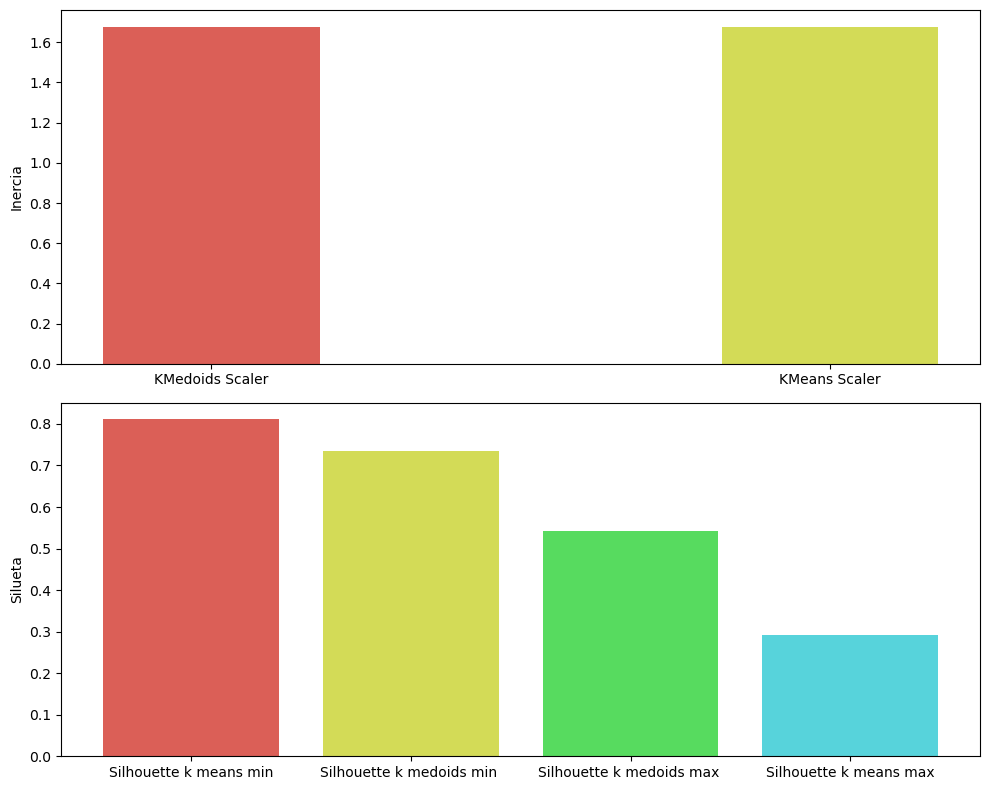

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define los nombres de los modelos
model_names = ['KMedoids Scaler', 'KMeans Scaler']

# Calcula los valores promedio de inercia
inercia_SS_avg_D = np.mean([inercia_kmedoids_SS, inercia_kmedoids_SSK])
inercia_SS_avg = np.mean([inercia_kmeans_SS, inercia_kmeans_SSK])
inercia_values_avg = [inercia_SS_avg, inercia_SS_avg]

# Define los valores de las métricas de silueta y sus etiquetas
silhouette_values = [silhouette_SS,silhouette_DSS, silhouette_SSK, silhouette_DSSK]
silhouette_labels = ['Silhouette k means min', 'Silhouette k medoids min ', 'Silhouette k medoids max ','Silhouette k means max' ]
palette = sns.color_palette('hls', k)
# Graficar las métricas de inercia y silueta
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Graficar las métricas de inercia
x = np.arange(len(model_names))
width = 0.35
axs[0].bar(x, inercia_values_avg, width, color=palette)
axs[0].set_ylabel('Inercia')
axs[0].set_xticks(x)
axs[0].set_xticklabels(model_names)

# Graficar las métricas de silueta
axs[1].bar(silhouette_labels, silhouette_values, color=palette)
axs[1].set_ylabel('Silueta')

plt.tight_layout()
plt.show()

## Graficar los resultados

In [ ]:
#InvoiceNo	AmountTotal	LastInvoce
def resultados(df, pred):
    df_result = df.copy()
    df_result['cluster'] = pred
    at = df_result[df_result["AmountTotal"] < 75000]
    k = at['cluster'].nunique()
    fig, axes = plt.subplots(3, 1,figsize=(16,12))
    axes[0].set_title("AmountTotal vs LastInvoce")
    axes[1].set_title("AmountTotal vs InvoiceNo")
    axes[2].set_title("LastInvoce vs InvoiceNo")
    sns.scatterplot(data=at, x=at["AmountTotal"], y=at["LastInvoce"], hue = at["cluster"], palette = sns.color_palette('hls',k), ax=axes[0])
    sns.scatterplot(data=at, x=at["AmountTotal"], y=at["InvoiceNo"], hue = at["cluster"], palette = sns.color_palette('hls',k), ax=axes[1])
    sns.scatterplot(data=at, x=at["LastInvoce"], y=at["InvoiceNo"], hue = at["cluster"], palette = sns.color_palette('hls',k), ax=axes[2])

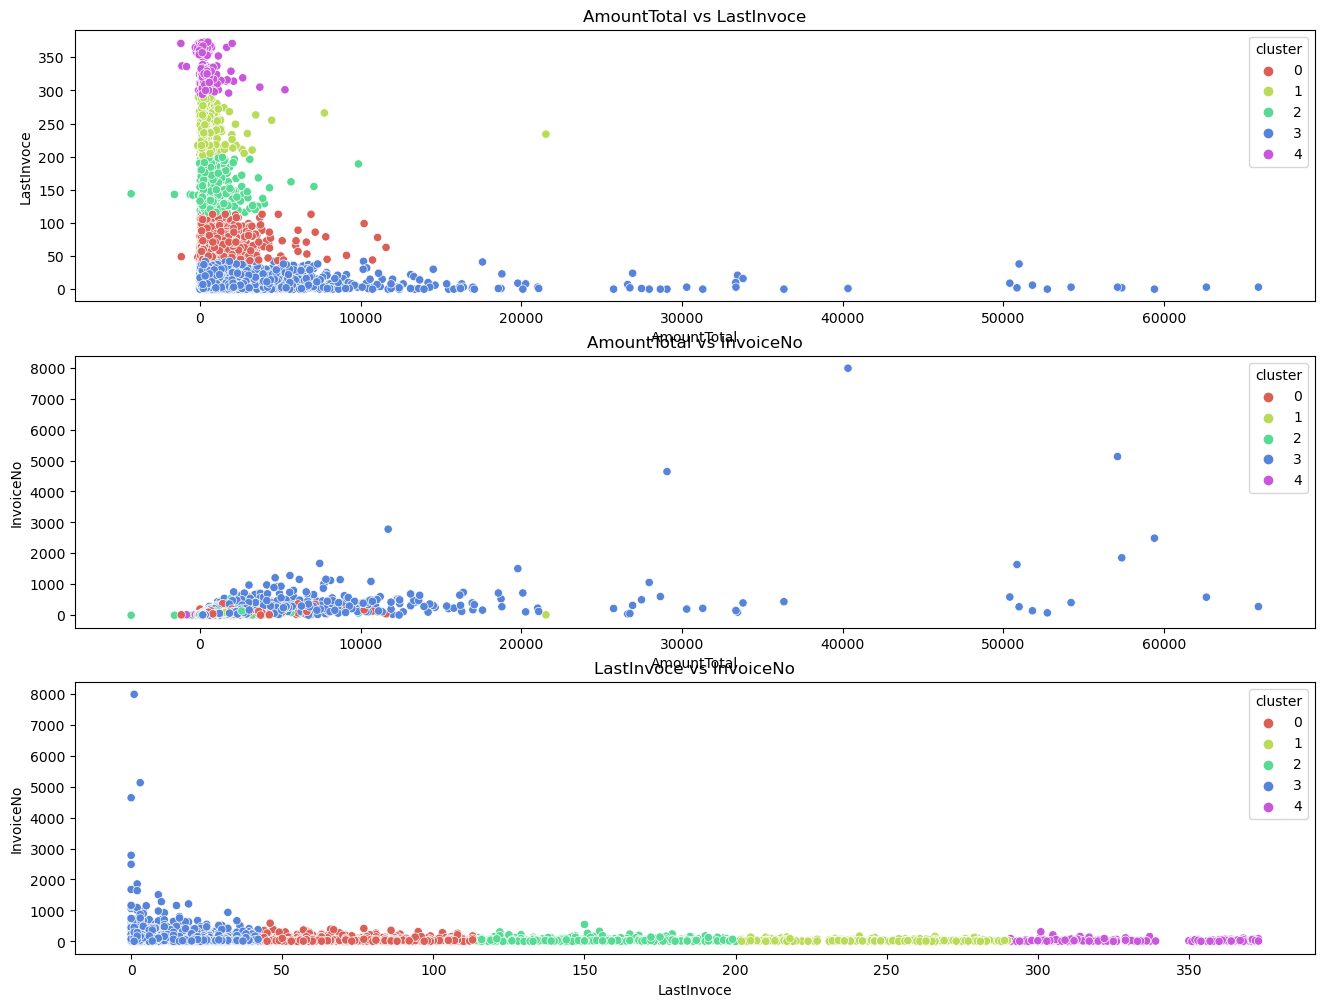

In [ ]:
resultados(new_retail, predMMSK)

In [ ]:
def resultadosD(df, predD):
    df_result = df.copy()
    df_result['cluster'] = predD
    at = df_result[df_result["AmountTotal"] < 75000]
    k = at['cluster'].nunique()
    fig, axes = plt.subplots(3, 1,figsize=(16,12))
    axes[0].set_title("AmountTotal vs LastInvoce")
    axes[1].set_title("AmountTotal vs InvoiceNo")
    axes[2].set_title("LastInvoce vs InvoiceNo")
    sns.scatterplot(data=at, x=at["AmountTotal"], y=at["LastInvoce"], hue = at["cluster"], palette = sns.color_palette('hls',k), ax=axes[0])
    sns.scatterplot(data=at, x=at["AmountTotal"], y=at["InvoiceNo"], hue = at["cluster"], palette = sns.color_palette('hls',k), ax=axes[1])
    sns.scatterplot(data=at, x=at["LastInvoce"], y=at["InvoiceNo"], hue = at["cluster"], palette = sns.color_palette('hls',k), ax=axes[2])

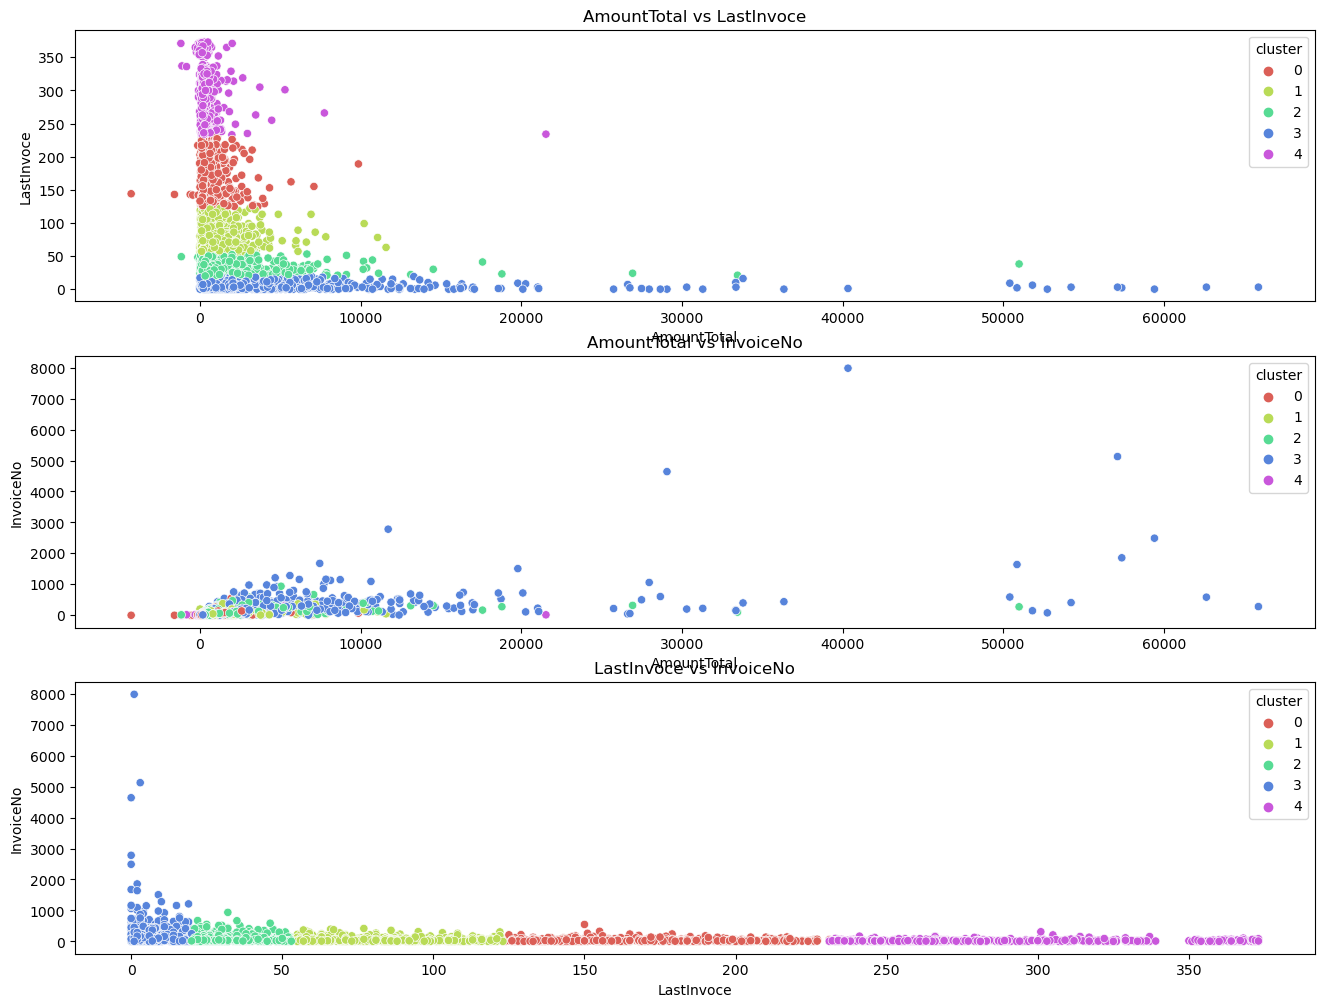

In [ ]:
resultadosD(new_retail, predDMMSK)

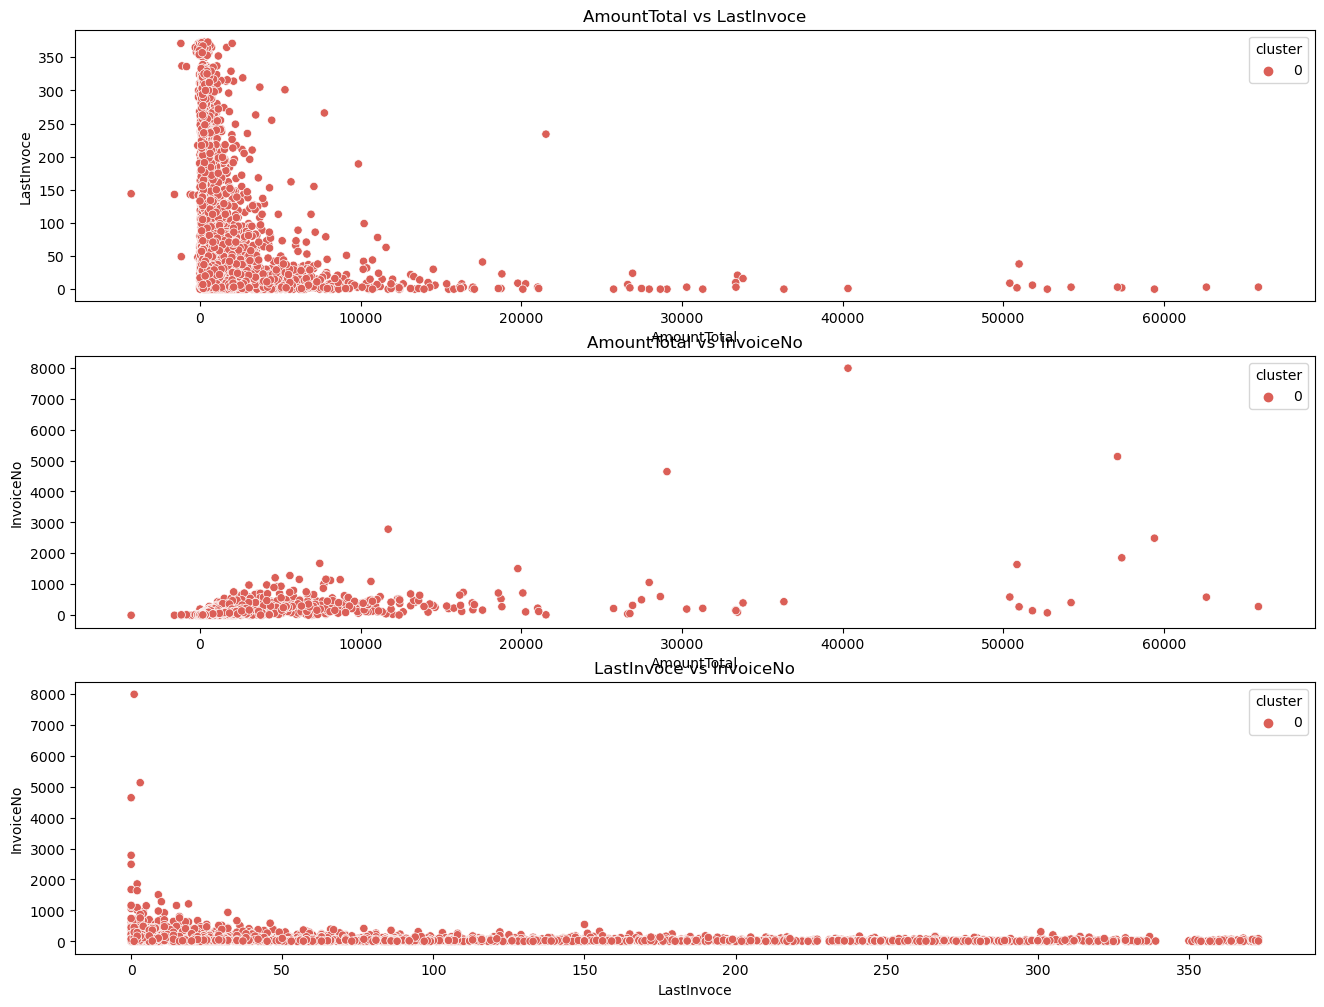

In [ ]:
resultados(new_retail, predSS)

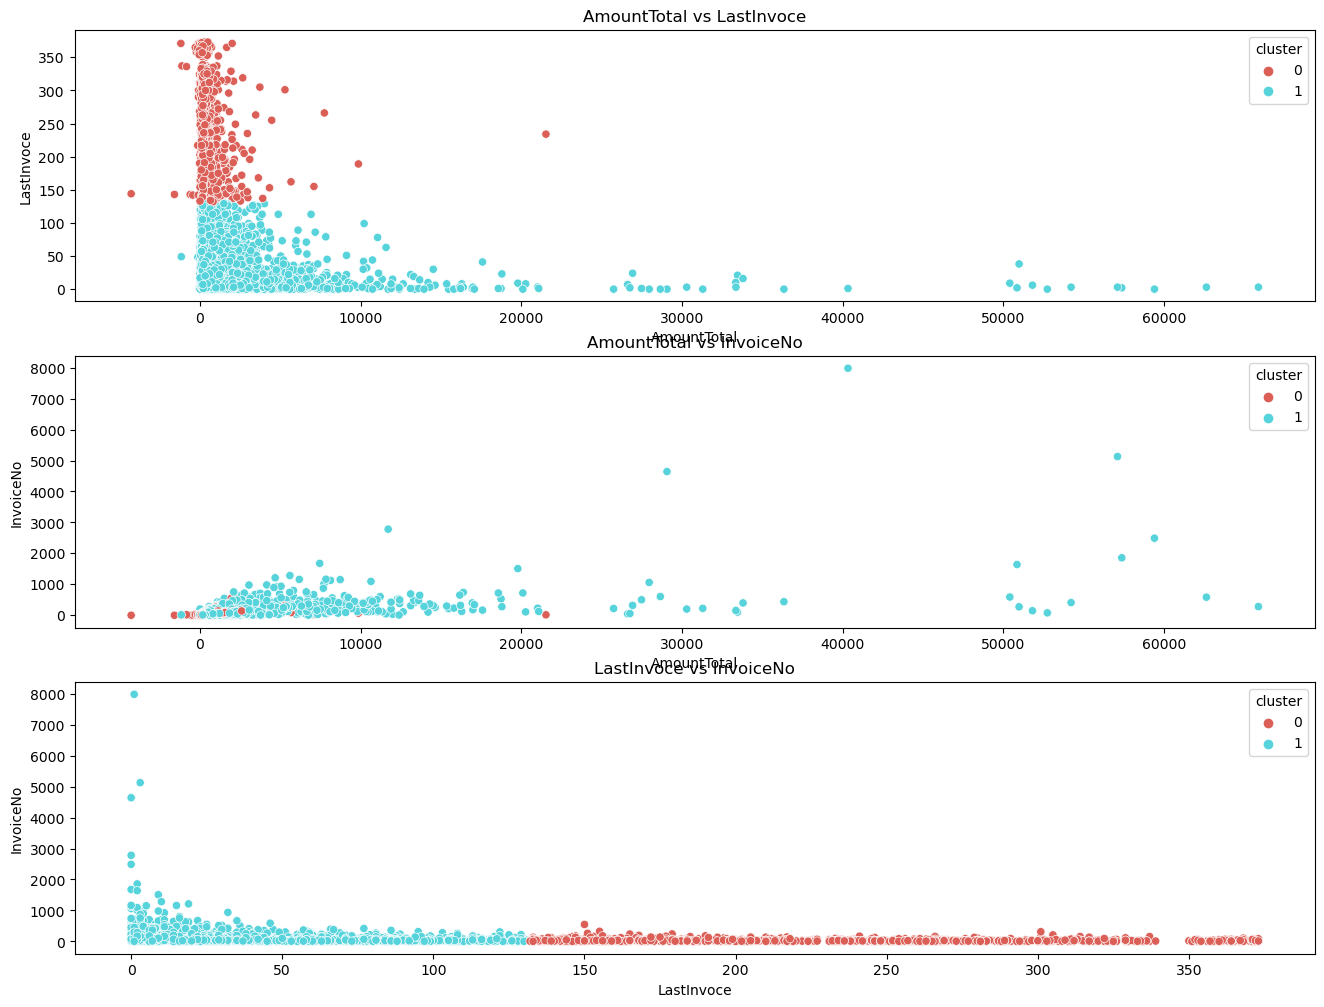

In [ ]:
resultados(new_retail, predDSS)

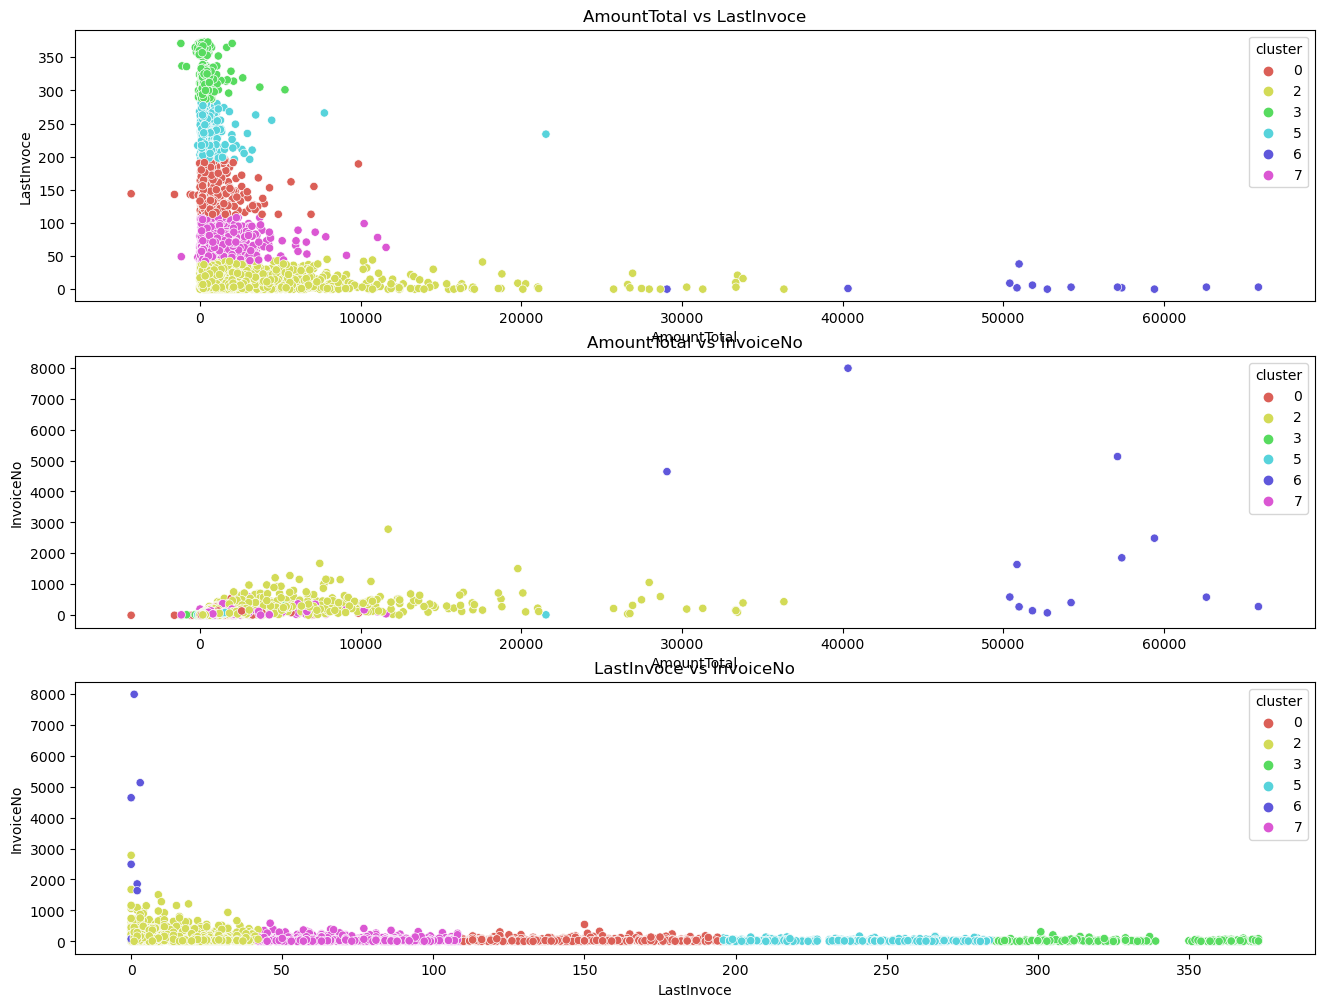

In [ ]:
resultados(new_retail, predSSK)

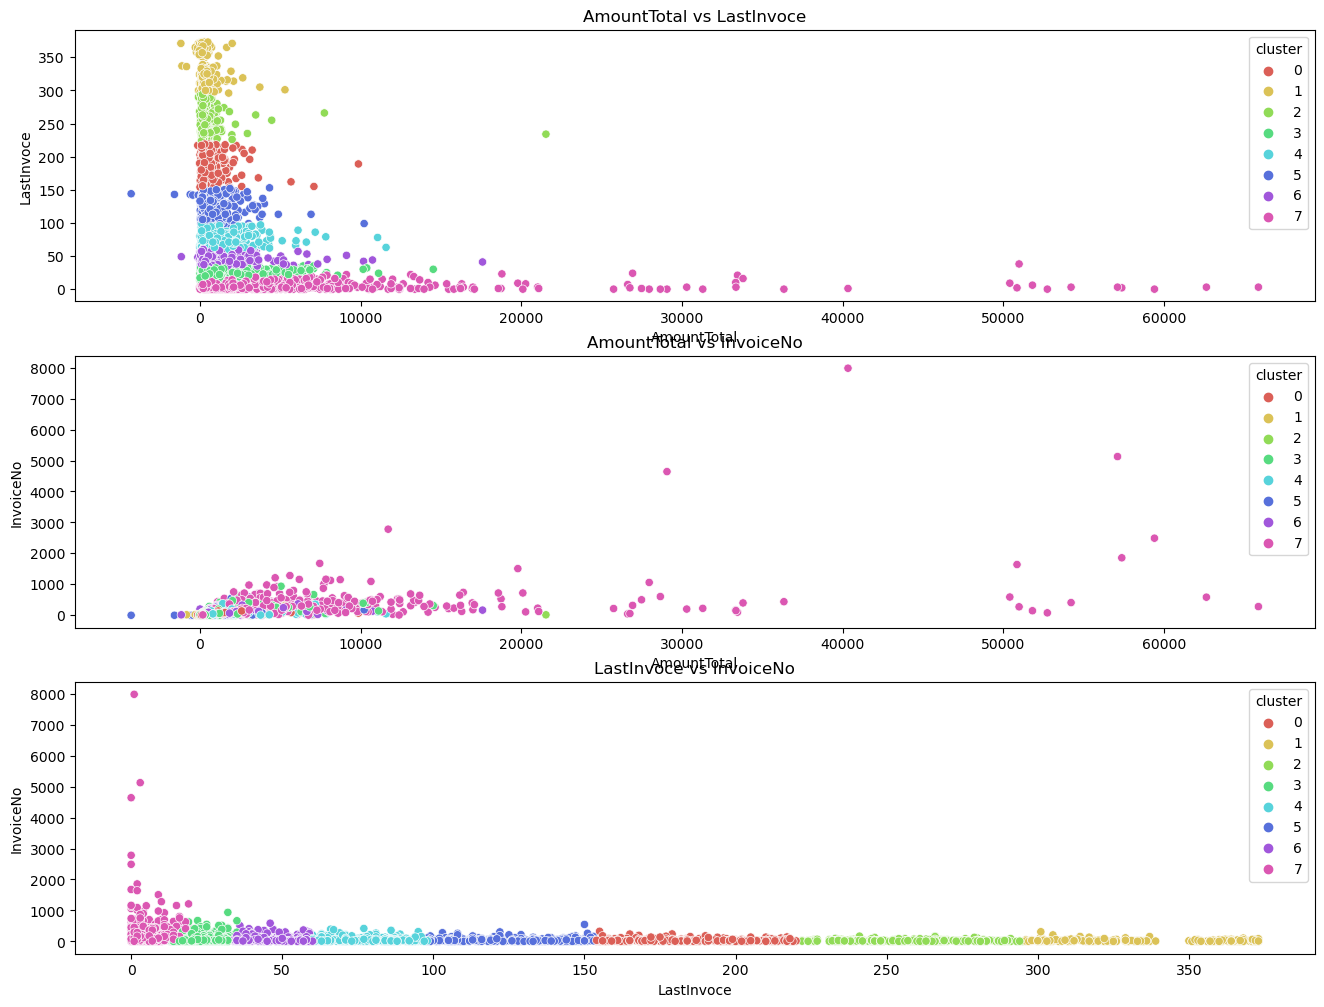

In [ ]:
resultados(new_retail, predDSSK)

## Método Silhouette

El valor de la puntuación de Silhouette varía de -1 a 1. Si la puntuación es 1, el grupo es denso y está bien separado que otros grupos. Un valor cercano a 0 representa grupos superpuestos con muestras muy cercanas al límite de decisión de los grupos vecinos. Una puntuación negativa (-1,0) indica que las muestras pueden haber sido asignadas a grupos incorrectos.

https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam

In [ ]:
#Min
silhouette_MMS = silhouette_score(df_MMS, kmeansMMS.labels_, metric='euclidean')
print(silhouette_MMS)

0.7382238144928448


In [ ]:
#MIN
silhouette_DMMS = silhouette_score(df_MMS, kmedoidsMMS.labels_, metric='euclidean')
print(silhouette_DMMS)

0.734996968429592


In [ ]:
#MAX
silhouette_MMSk = silhouette_score(df_MMS, kmeansMMSK.labels_, metric='euclidean')
print(silhouette_MMSk)

0.6136461096265166


In [ ]:
#MAX
silhouette_DMMSk = silhouette_score(df_MMS, kmedoidsDMMSK.labels_, metric='euclidean')
print(silhouette_DMMSk)

0.5449958312772962


In [ ]:
silhouette_SS = silhouette_score(df_SS, kmeansSS.labels_, metric='euclidean')
print(silhouette_SS)

0.9875772332183523


In [ ]:
silhouette_DSS = silhouette_score(df_SS, kmedoidsSSK.labels_, metric='euclidean')
print(silhouette_DSS)

0.2920006006870645


In [ ]:
#Modelo entrenado con Standardscaler
silhouette_SSK = silhouette_score(df_SS, kmeansSSK.labels_, metric='euclidean')
print(silhouette_SSK)

0.5416249580468708


In [ ]:
#Standardscaler kmedoids
silhouette_DSSK = silhouette_score(df_SS, kmedoidsSSK.labels_, metric='euclidean')
print(silhouette_DSSK)

0.2920006006870645


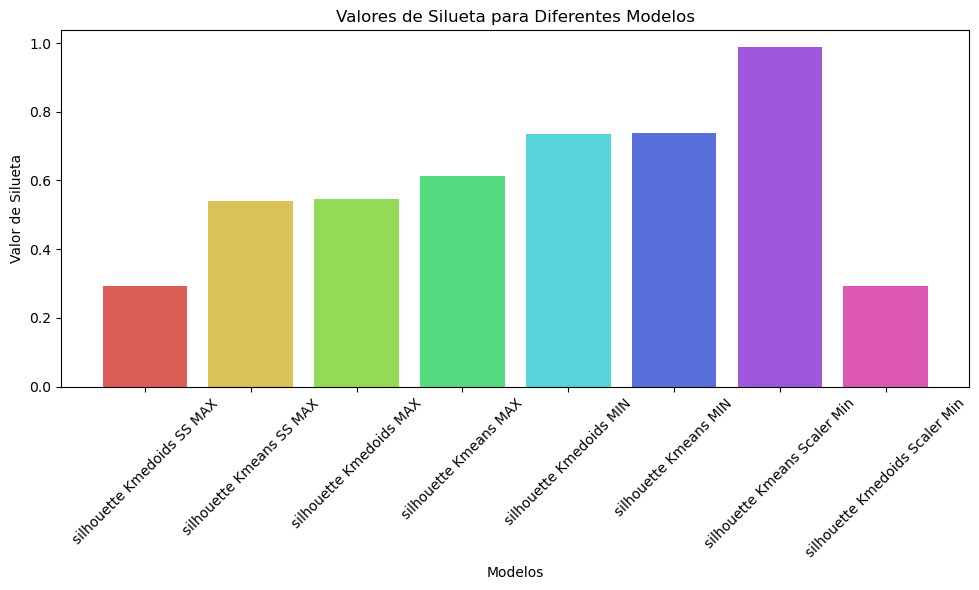

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Definir los nombres de los modelos
model_names = ['silhouette Kmedoids SS MAX', 'silhouette Kmeans SS MAX', 'silhouette Kmedoids MAX', 'silhouette Kmeans MAX', 'silhouette Kmedoids MIN', 'silhouette Kmeans MIN', 'silhouette Kmeans Scaler Min','silhouette Kmedoids Scaler Min']

# Definir los valores de las métricas de silueta
silhouette_values = [silhouette_DSSK, silhouette_SSK, silhouette_DMMSk, silhouette_MMSk, silhouette_DMMS, silhouette_MMS,silhouette_SS,silhouette_DSS]

# Obtener una paleta de colores HLS con el mismo número de colores que modelos
k = len(model_names)
palette = sns.color_palette('hls', k)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.bar(model_names, silhouette_values, color=palette)

# Agregar etiquetas y título
plt.xlabel('Modelos')
plt.ylabel('Valor de Silueta')
plt.title('Valores de Silueta para Diferentes Modelos')

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Se toma el mejor modelo MMS o SC con el número de clústers que tengan mejor silhoutte

## <span style="color:DarkciónBlue"> 4. Conclusiones</span>



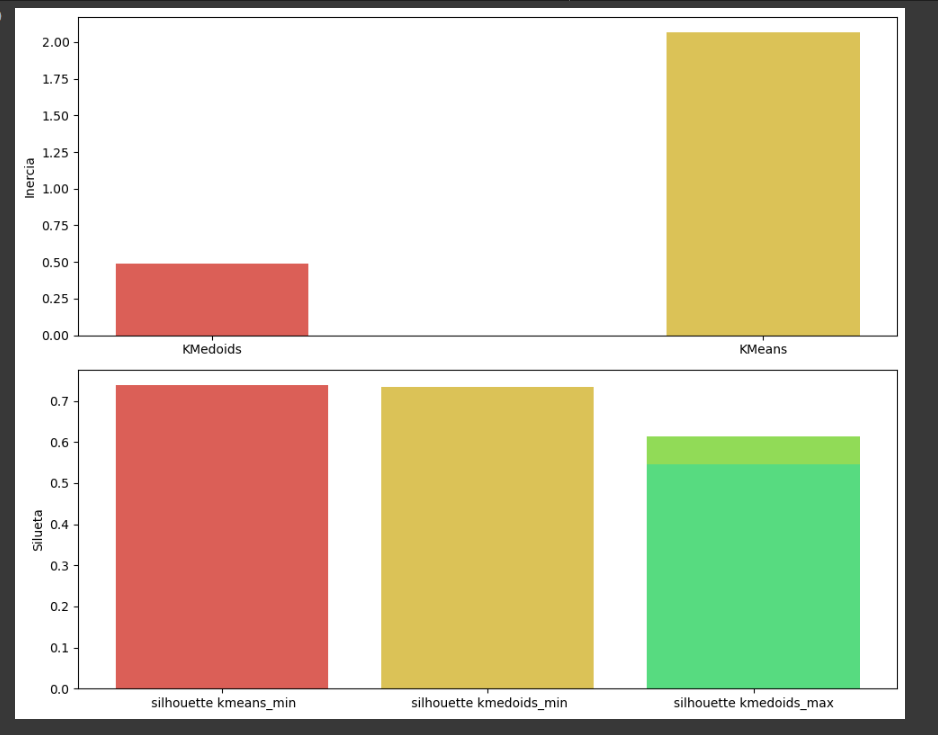

**Figura 1**

En la fig 1 podemos ver como se comportan los algoritmos KMeans y KMedoids en términos de "inercia" y "puntuación de silueta".
Los resultados obtenidos en KMeans muestra una inercia mínima más baja que KMedoids, lo que sugiere que sus grupos podrían estar más juntos en nuestros datos.
Tambien tanto la inercia mínima como máxima de KMeans son más bajas que las de KMedoids, lo que indica que los grupos de KMeans son más compactos en general.
En cuanto a la puntuación de solhouette, ambos algoritmos tienen valores altos cuando tenemos el menor número de grupos,
pero KMeans se destaca un poquito más. Sin embargo, cuando aumentamos el número
de grupos, la puntuación de silueta de KMeans disminuye más rápido que la de KMedoids.
En conclusión, tenemos que KMeans podría ser la mejor opción para este conjunto de datos,
ya que tiene una inercia más baja y una puntuación de solhouette generalmente más alta,
especialmente cuando tenemos pocos grupos.

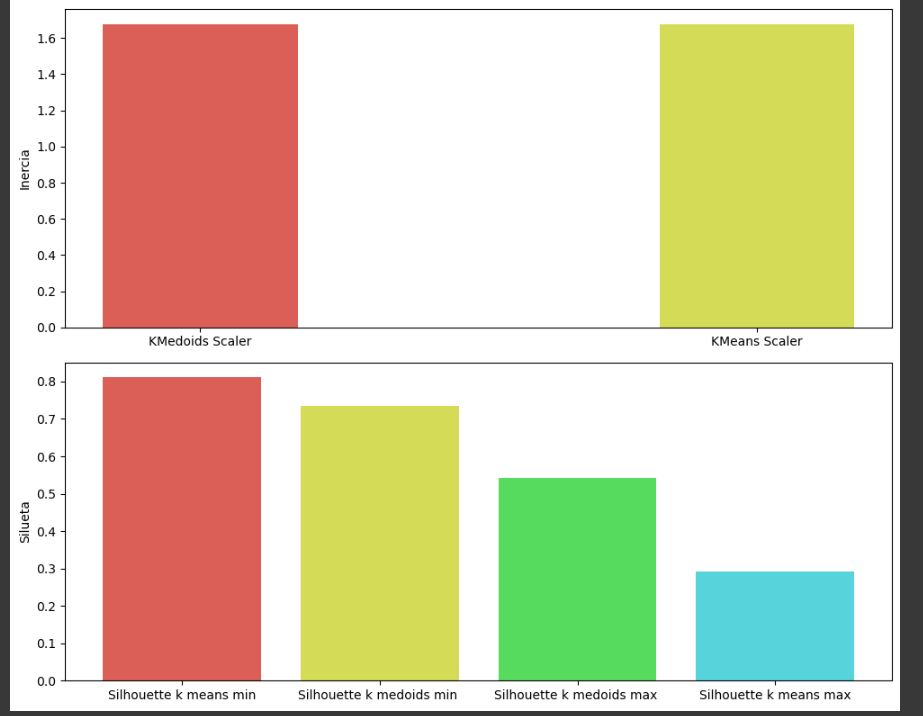

**Figura 2.**

En la figura 2 la comparación entre los algoritmos KMeans y KMedoids revela que KMedoids
tiende a formar grupos más juntos, especialmente cuando se considera la
inercia mínima, mientras que KMeans muestra una ligera mejora en la inercia máxima.
Sin embargo, en términos de la puntuación de solhouette, KMeans sobresale en la separación
de grupos, especialmente en el escenario de un número mínimo de clusters,
aunque su rendimiento disminuye más rápidamente con un aumento en el
número de clusters en comparación con KMedoids.

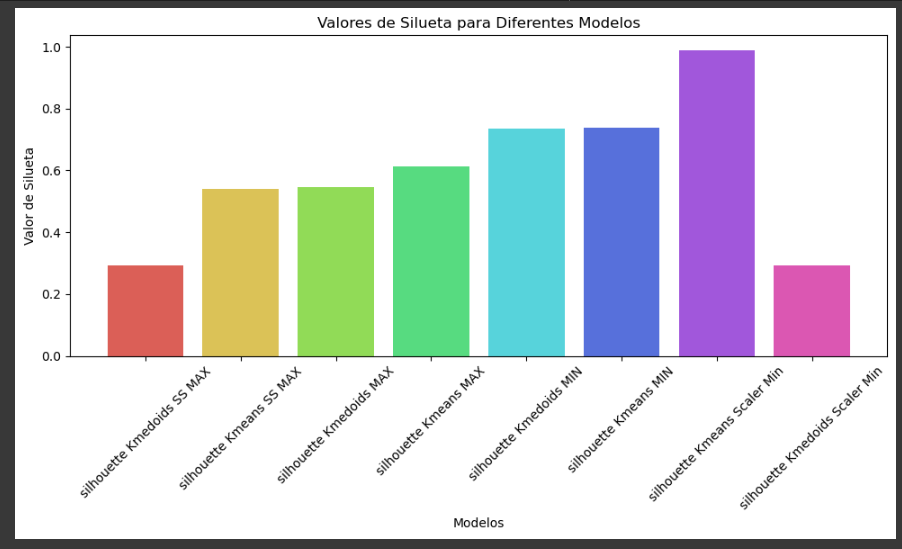

**Figura 3**

 En resumen, si se  busca una buena separación entre grupos,
lo mas recomendable seria utilizar KMeans con StandardScaler (SS),
ya que parece funcionar mejor, especialmente cuando tenemos pocos clusters.
Pero or otro lado, si priorizas una inercia mínima y
estás trabajando con un número pequeño de clusters, entonces KMedoids podría ser
la mejor opción, incluso si su Silhouette score es un poco más bajo que el de KMeans
con SS. Sin embargo, es importante tener en cuenta que el Silhouette score de KMeans
puede disminuir significativamente cuando se usan muchos clusters.



## <span style="color:DarkciónBlue"> 5. Referencias</span>
P. Arora, D. Dr., y S. Varshney, "Analysis of K-Means and K-Medoids Algorithm For Big Data," en Proceedings of the International Conference on Information Security & Privacy (ICISP2015), Nagpur, India, 11-12 Dec. 2015, Accessed: Mar. 18 April, 2024